In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import astropy.units as u
import astropy.coordinates as coord
from astroquery.vizier import Vizier
%matplotlib inline
from astropy.io import fits
from astroquery.simbad import Simbad
import matplotlib
import aplpy
from astroquery.sdss import SDSS

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [5]:
def converter1(h,m,s):
    deg=((h/24)+(m/(24*60))+(s/(24*60*60)))*360
    return deg
def converter2(degree):
    hour= (degree/360)*24
    minute=(hour-hour//1)*60
    second=(minute-minute//1)*60
    hour=hour//1
    minute=minute//1
    return hour,minute,second

In [6]:
converter2(237.318405)

(15.0, 49.0, 16.417200000001344)

In [17]:
converter1(55.0,44.0,4.0)

836.0166666666665

In [157]:
'''from pymongo import MongoClient
from bson.objectid import ObjectId
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import astropy.units as u
from astroquery.magpis import Magpis
import astropy.coordinates as coord
from astroquery.vizier import Vizier
%matplotlib inline
from astropy.io import fits
from astroquery.simbad import Simbad
import magic
from astropy.utils.data import download_file
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline'''

'from pymongo import MongoClient\nfrom bson.objectid import ObjectId\nimport matplotlib.pyplot as plt \nimport numpy as np\nimport matplotlib\nimport astropy.units as u\nfrom astroquery.magpis import Magpis\nimport astropy.coordinates as coord\nfrom astroquery.vizier import Vizier\n%matplotlib inline\nfrom astropy.io import fits\nfrom astroquery.simbad import Simbad\nimport magic\nfrom astropy.utils.data import download_file\nimport numpy as np\n%config InlineBackend.rc = {}\nimport matplotlib\nimport matplotlib.pyplot as plt\n%matplotlib inline'

In [158]:
#Finding LOTSS Catalogue

#Vizier.ROW_LIMIT = -1
catalog_list = Vizier.find_catalogs('LOTSS')
LOTSS = Vizier.get_catalogs(catalog_list.keys())[0]
#print(LOTSS)

In [159]:
#Finding TGSS catalogue

Vizier.ROW_LIMIT = 301
catalog_list2 = Vizier.find_catalogs('TGSS')
TGSS = Vizier.get_catalogs(catalog_list2.keys())[3]
#print(TGSS)

In [160]:
#Finding CV catalogue

Vizier.ROW_LIMIT = 500
catalog_list3 = Vizier.find_catalogs('Downes')
CV = Vizier.get_catalogs(catalog_list2.keys())[0]
#print(CV)

In [161]:
#Finding data from TGSS
TGSS_data = Vizier(row_limit= -1,catalog='TGSS',columns=['ALL', '_RAJ2000', '_DEJ2000','Stotal']).query_region(coord.SkyCoord(ra=166.0, dec=46.0,unit=(u.deg, u.deg),frame='icrs'),width="500m")[0]
print TGSS_data

 _RAJ2000  _DEJ2000   Stotal 
   deg       deg       mJy   
--------- --------- ---------
159.61011  49.54332     112.2
159.61662  49.48931     144.5
159.64256  49.59751      38.6
159.66096  49.79327    1065.3
159.67867  48.82268     171.3
159.68533  49.92378     455.4
159.69304  49.63331      23.3
159.72136  48.42358      27.3
159.72401  49.22386      27.1
159.75632  49.53175     101.2
      ...       ...       ...
172.06393  47.96041      34.4
172.07516  47.87850      31.1
172.07854  50.00899     106.5
172.08524  47.51095     344.7
172.09352  48.38638      94.3
172.13731  48.49623      57.3
172.17036  49.18748     110.5
172.18922  49.56780      60.2
172.24599  48.51965     194.5
172.30782  49.03779      41.7
Length = 1584 rows


In [162]:
#Finding data from LOTSS

LOTSS_data = Vizier(row_limit= -1,catalog='LOTSS',columns=['ALL', '_RAJ2000', '_DEJ2000','FTot','e_RAdegtot','e_DEdegtot',]).query_region(coord.SkyCoord(ra=166.0, dec=46.0,unit=(u.deg, u.deg),frame='icrs'),width="500m")[0]
print LOTSS_data

 _RAJ2000  _DEJ2000     FTot    e_RAdegtot e_DEdegtot
   deg       deg        mJy        arcs       arcs   
--------- --------- ----------- ---------- ----------
166.19070  46.42053    15.01126    3.97643    3.43343
166.18161  47.44787   444.37811    1.72519    1.82371
166.17230  44.92987   213.55494    1.81944    1.92231
166.17397  47.10714    13.36425    1.76605    1.78757
166.16546  46.43109   115.44759    1.70193    1.70231
166.14841  46.43563    15.43040    1.95739    2.34693
166.16394  46.89178    21.07334    1.91322    2.10443
166.16324  46.37215     9.22989    1.80090    1.80265
166.15361  45.12481    75.84022    1.75905    1.77814
166.15410  45.98517    30.00148    1.77314    1.83322
      ...       ...         ...        ...        ...
168.43923  49.14680   116.13464    1.70816    1.71536
168.40027  49.67628    60.10172    1.70854    1.70961
168.41537  49.41513    10.37713    1.88029    2.05188
168.37630  49.99964    14.51786    3.06041    2.93422
168.37882  49.77349    13.47

In [163]:
#Finding CV data 
CV_data = Vizier(row_limit= -1,catalog='Downes+ 2001-2006',columns=['ALL', '_RAJ2000', '_DEJ2000']).query_region(coord.SkyCoord(ra=250.0, dec=70.0,unit=(u.deg, u.deg),frame='icrs'),width="100000m")[0]
print CV_data

 _RAJ2000  _DEJ2000
   deg       deg   
--------- ---------
  1.54150  55.98075
  2.78042  30.54333
  2.88792  18.83011
  3.18125  52.78889
  4.53262  57.43531
  4.56208  66.30375
  4.73721  34.91231
  4.78875  41.46167
  4.95804  21.94781
  5.21767  55.70450
      ...       ...
355.09875  12.62825
355.44667  57.51661
356.23962  43.52286
357.21629  51.46094
357.57008  46.98939
357.82304  60.30317
358.46854  23.15572
358.66329  28.38047
359.25071  56.75244
359.99279  12.74639
Length = 931 rows


In [164]:
#finding alt data from LOTSS catalouge

LOTSS_data2 = Vizier(row_limit= -1,catalog='LOTSS',columns=['ALL', '_RAJ2000', '_DEJ2000','FTot']).query_constraints(_RAJ2000="166.0..167.0",_DEJ2000="46.0..47.0")[0]
#print(LOTSS_data2)

In [165]:
#finding alt data from TGSS catalouge

TGSS_data2 = Vizier(row_limit= -1,catalog='TGSS',columns=['ALL', '_RAJ2000', '_DEJ2000','Stotal']).query_constraints(_RAJ2000="166..167",_DEJ2000="46.0..47.0")[0]
#print(TGSS_data2)

In [166]:
#Creating alt arrays coordinate data(LOTSS)

RA_LOTSS2=[]
for value in LOTSS_data2["_RAJ2000"]:
    RA_LOTSS2.append(value)
#print RA_LOTSS2
DE_LOTSS2=[]
for value in LOTSS_data2["_DEJ2000"]:
    DE_LOTSS2.append(value)
#print DE_LOTSS2


In [167]:
#Creating alt arrays coordinate data(TGSS)

RA_TGSS2=[]
for value in TGSS_data2["_RAJ2000"]:
    RA_TGSS2.append(value)
#print RA_TGSS2
DE_TGSS2=[]
for value in TGSS_data2["_DEJ2000"]:
    DE_TGSS2.append(value)
#print DE_TGSS2

In [168]:
'''#Plotting alt coords of data from two telescopes in same section of sky
 

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(RA_LOTSS2, DE_LOTSS2, s=10, c='b', marker="s", label='first')
ax1.scatter(RA_TGSS2,DE_TGSS2, s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
#plt.show()'''

'#Plotting alt coords of data from two telescopes in same section of sky\n \n\nfig = plt.figure()\nax1 = fig.add_subplot(111)\nax1.scatter(RA_LOTSS2, DE_LOTSS2, s=10, c=\'b\', marker="s", label=\'first\')\nax1.scatter(RA_TGSS2,DE_TGSS2, s=10, c=\'r\', marker="o", label=\'second\')\nplt.legend(loc=\'upper left\');\n#plt.show()'

In [169]:
#Creating arrays coordinate data(LOTSS)

RA_LOTSS=[]
for value in LOTSS_data["_RAJ2000"]:
    RA_LOTSS.append(value)
#print RA_LOTSS
DE_LOTSS=[]
for value in LOTSS_data["_DEJ2000"]:
    DE_LOTSS.append(value)
#print DE_LOTSS

In [170]:
#Creating arrays coordinate data(TGSS)

RA_TGSS=[]
for value in TGSS_data["_RAJ2000"]:
    RA_TGSS.append(value)
#print RA_TGSS
DE_TGSS=[]
for value in TGSS_data["_DEJ2000"]:
    DE_TGSS.append(value)
#print DE_TGSS

In [171]:
'''fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(RA_LOTSS, DE_LOTSS, s=10, c='b', marker="s", label='LOTSS')
ax1.scatter(RA_TGSS,DE_TGSS, s=10, c='r', marker="o", label='TGSS')
plt.legend(loc='upper left');
plt.show()'''

'fig = plt.figure()\nax1 = fig.add_subplot(111)\nax1.scatter(RA_LOTSS, DE_LOTSS, s=10, c=\'b\', marker="s", label=\'LOTSS\')\nax1.scatter(RA_TGSS,DE_TGSS, s=10, c=\'r\', marker="o", label=\'TGSS\')\nplt.legend(loc=\'upper left\');\nplt.show()'

In [172]:
#Creating arrays coordinate data(CV)

RA_CV=[]
for value in CV_data["_RAJ2000"]:
    RA_CV.append(value)
#print RA_CV
DE_CV=[]
for value in CV_data["_DEJ2000"]:
    DE_CV.append(value)
#print DE_CV

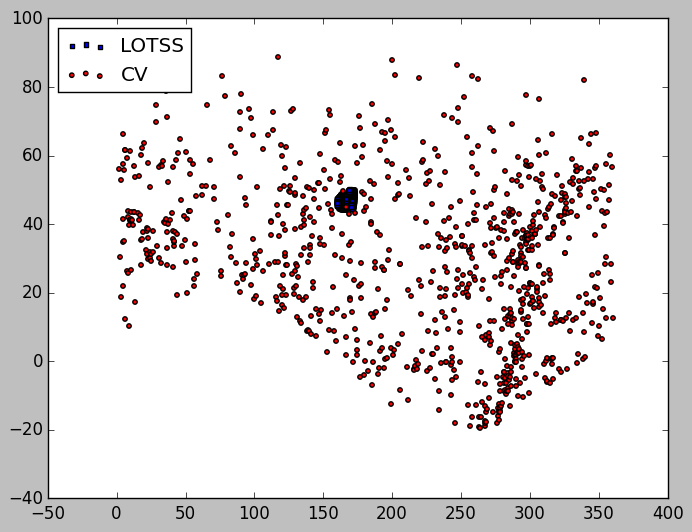

In [173]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(RA_LOTSS, DE_LOTSS, s=10, c='b', marker="s", label='LOTSS')
ax1.scatter(RA_CV,DE_CV, s=10, c='r', marker="o", label='CV')
plt.legend(loc='upper left');
plt.show()

In [174]:
#n=0
#for value in RA_LOTSS:
    #if value+.05>RA_TGSS[n] and value-.05<RA_TGSS[n]:
        #print "LOTSS:",value,"TGSS:",RA_TGSS[n]
    #n=n+1
    #if n==len(RA_LOTSS):
        #break

     

In [175]:
RA_LOTSS_e=[]
for value in LOTSS_data["e_RAdegtot"]:
    RA_LOTSS_e.append(value)
#print RA_LOTSS_e
DE_LOTSS_e=[]
for value in LOTSS_data["e_DEdegtot"]:
    DE_LOTSS_e.append(value)
#print DE_LOTSS_e

In [176]:
Lum_LOTSS=[]
for value in LOTSS_data["FTot"]:
    Lum_LOTSS.append(value)
#print Lum_LOTSS
Lum_TGSS=[]
for value in TGSS_data["Stotal"]:
    Lum_TGSS.append(value)
#print Lum_TGSS

In [177]:
Lum_LOTSS_data=[]
Lum_TGSS_data=[]
n=0
m=0
#go through both data sets
while n<len(RA_LOTSS) and n<len(RA_TGSS):
    #if coordinates within error range then..
    if RA_LOTSS[n]+RA_LOTSS_e[n]>RA_TGSS[n] and RA_LOTSS[n]-RA_LOTSS_e[n]<RA_TGSS[n] and DE_LOTSS[n]+DE_LOTSS_e[n]>DE_TGSS[n] and DE_LOTSS[n]-DE_LOTSS_e[n]<DE_TGSS[n]:
        #print coords and luminosity
        print n,":"
        print "LOTSS RA:",RA_LOTSS[n],"TGSS RA:",RA_TGSS[n]
        print "LOTSS DE:",DE_LOTSS[n],"TGSS DE:",DE_TGSS[n]
        print "LOTSS Lum:",Lum_LOTSS[n],"TGSS Lum:",Lum_TGSS[n]
        Lum_LOTSS_data.append(Lum_LOTSS[n])
        Lum_TGSS_data.append(Lum_TGSS[n])
        m=m+1
    n=n+1
print Lum_LOTSS_data
print m
print n

300 :
LOTSS RA: 164.98549 TGSS RA: 162.15173
LOTSS DE: 48.56857 TGSS DE: 47.74258
LOTSS Lum: 20.32505 TGSS Lum: 150.6
347 :
LOTSS RA: 164.86614 TGSS RA: 162.44476
LOTSS DE: 46.12152 TGSS DE: 48.07909
LOTSS Lum: 38.86474 TGSS Lum: 42.7
366 :
LOTSS RA: 164.73237 TGSS RA: 162.52779
LOTSS DE: 48.43077 TGSS DE: 46.38538
LOTSS Lum: 3.54065 TGSS Lum: 44.5
372 :
LOTSS RA: 164.76188 TGSS RA: 162.57021
LOTSS DE: 46.24894 TGSS DE: 48.3303
LOTSS Lum: 4.36968 TGSS Lum: 40.7
376 :
LOTSS RA: 164.70073 TGSS RA: 162.61707
LOTSS DE: 48.31059 TGSS DE: 50.11042
LOTSS Lum: 3.02624 TGSS Lum: 30.1
377 :
LOTSS RA: 164.78071 TGSS RA: 162.62534
LOTSS DE: 45.11753 TGSS DE: 46.67533
LOTSS Lum: 18.44878 TGSS Lum: 39.9
381 :
LOTSS RA: 164.72277 TGSS RA: 162.66577
LOTSS DE: 47.17003 TGSS DE: 46.13663
LOTSS Lum: 3.08821 TGSS Lum: 43.7
382 :
LOTSS RA: 164.7617 TGSS RA: 162.67496
LOTSS DE: 45.61076 TGSS DE: 46.36131
LOTSS Lum: 9.34527 TGSS Lum: 229.9
392 :
LOTSS RA: 164.7053 TGSS RA: 162.71664
LOTSS DE: 46.59589 TGSS D

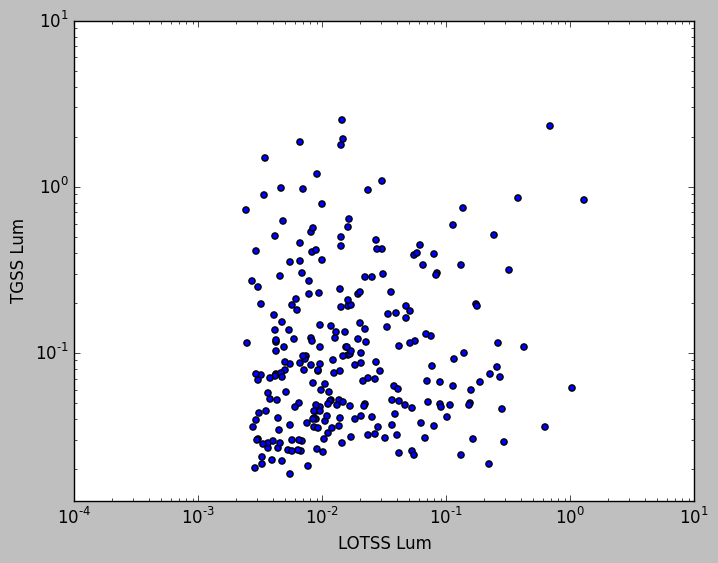

In [178]:
import matplotlib.pyplot as plt 
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(np.array(Lum_LOTSS_data)/1000., np.array(Lum_TGSS_data)/1000.)
plt.xlabel('LOTSS Lum')
plt.ylabel('TGSS Lum')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0001,10)
plt.ylim(0,10)
plt.show()

In [179]:
print min(np.array(Lum_LOTSS_data)*0.001)
print min(np.array(Lum_TGSS_data)*0.001)

0.00241543
0.0187


In [180]:
n=0
m=0
#go through both data sets
while n<len(RA_LOTSS) and n<len(RA_CV):
    #if coordinates within error range then..
    if RA_LOTSS[n]+RA_LOTSS_e[n]>RA_CV[n] and RA_LOTSS[n]-RA_LOTSS_e[n]<RA_CV[n] and DE_LOTSS[n]+DE_LOTSS_e[n]>DE_CV[n] and DE_LOTSS[n]-DE_LOTSS_e[n]<DE_CV[n]:
        #print coords and luminosity
        print n,":"
        print "LOTSS RA:",RA_LOTSS[n],"CV RA:",RA_CV[n]
        print "LOTSS DE:",DE_LOTSS[n],"CV DE:",DE_CV[n]
        print "LOTSS RA error:",RA_LOTSS_e[n]
        print "LOTSS DE error:",DE_LOTSS_e[n]
        m=m+1
        #print "LOTSS Lum:",Lum_LOTSS[n],"TGSS Lum:",Lum_CV[n]
    n=n+1
print "No. CVs:",n
print "No. CVs corrolated:",m

294 :
LOTSS RA: 165.01877 CV RA: 164.23752
LOTSS DE: 48.52281 CV DE: 49.68841
LOTSS RA error: 1.86379
LOTSS DE error: 1.90966
No. CVs: 931
No. CVs corrolated: 1


In [181]:
Simbad.query_object('CY UMa')

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,unicode13,unicode13,int16,int16,float32,float32,int16,unicode1,unicode1,object
V* CY UMa,10 56 57.00,+49 41 18.2,6,6,80.000,70.000,3,B,I,2003yCat.2246....0C


In [ ]:
'''from astroquery.sdss import SDSS
from astropy import coordinates as coords
num=0
while num<m:
    pos=coords.SkyCoord(RA_Second_Relevant[num]*u.deg, DE_Second_Relevant[num]*u.deg)
    images = SDSS.get_images(pos)
    gc3 = aplpy.FITSFigure(images[0])
    gc3.show_grayscale()
    #gc3.show_markers(RA_First_Relevant, DE_First_Relevant, edgecolor='green', facecolor='none',marker='o', s=10, alpha=0.5)
    num=num+1'''

In [ ]:
#pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
#pos = coords.SkyCoord('10h56m57.00s +49d41m18.2s', frame='icrs')
#pos=coords.SkyCoord(RA_Second_Relevant[0]*u.deg, 49.68841*u.deg)
#pos=coords.SkyCoord(RA_Second_Relevant[0]*u.deg, DE_Second_Relevant[0]*u.deg)

In [ ]:
gc3 = aplpy.FITSFigure(images[0])
gc3.show_grayscale()
gc3.show_markers(RA_First_Relevant, DE_First_Relevant, edgecolor='green', facecolor='none',marker='o', s=10, alpha=0.5)

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt

hdulist = fits.open("frame-g-002883-1-0112.fits")
hdulist.info()

imgplot = plt.imshow(hdulist[0].data)
imgplot.set_cmap('binary_r')

plt.show()
hdulist.close()

In [ ]:
gc1 = aplpy.FITSFigure("frame-g-002883-1-0112.fits")
gc1.show_grayscale()
gc1.show_markers(RA_First_Relevant, DE_First_Relevant, edgecolor='green', facecolor='none',marker='o', s=10, alpha=0.5)
#gc1.show_circle(RA_First_Relevant, DE_First_Relevant,radius=4)
#gc1.show_grayscale(vmin=np.percentile(im,5),vmax=np.percentile(im,95))
#set_xaxis_coord_type(degree)
#set_yaxis_coord_type(degree)

In [ ]:
gc2 = aplpy.FITSFigure("frame-r-002883-1-0112.fits")
#gc2.show_grayscale()
gc2.show_colorscale()
gc2.show_markers(RA_First_Relevant, DE_First_Relevant, edgecolor='green', facecolor='none',marker='o', s=10, alpha=0.5)
#gc.show_grayscale(vmin=np.percentile(im,5),vmax=np.percentile(im,95))
#gc.show_grayscale(vmin=np.percentile(im,5),vmax=np.percentile(im,95))
#gc.show_markers(RA_First_Relevant, DE_First_Relevant, layer='marker_set_1', edgecolor='red',facecolor='none', marker='o', s=10, alpha=0.5)

In [ ]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
num=0
while num<m:
    #pos=coords.SkyCoord(RA_Second_Relevant[n]*u.deg, DE_Second_Relevant[n]*u.deg)
    images = SDSS.get_images(pos)
    num=num+1
#print image

In [ ]:
xid = SDSS.query_region(pos, spectro=True)

In [ ]:
scidata = xid[0].data
print scidata

In [ ]:
sp = SDSS.get_spectra(matches=xid)
im = SDSS.get_images(matches=xid, band='g')

In [ ]:
print sp
print im
print images[0]
print images

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt

hdulist = scidata
hdulist.info()

imgplot = plt.imshow(hdulist[0].data)
imgplot.set_cmap('binary_r')

plt.show()
hdulist.close()

In [ ]:
'''plt.figure()
plt.imshow(image, cmap='gray')
plt.colorbar()''

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt

hdulist = fits.open("frame-g-002883-1-0112.fits")
hdulist.info()
im2=hdulist[0].data

imgplot = plt.imshow(im2,vmin=np.percentile(im,5),vmax=np.percentile(im,95),cmap='gray')
imgplot.set_cmap('binary_r')

plt.show()
hdulist.close()

In [ ]:
gc = aplpy.FITSFigure("frame-g-002883-1-0112.fits")
gc.show_grayscale(vmin=np.percentile(im,5),vmax=np.percentile(im,95))

In [ ]:
#Original way of Finding data for all the stars that overlap

Lum_First_Relevant=[]
Lum_Second_Relevant=[]
n=0
m=0
#go through both data sets
while n<len(RA_First) and n<len(RA_Second):
    #if coordinates within error range then..
    elif RA_First[n]+RA_First_e[n]>RA_Second[n] and RA_First[n]-RA_First_e[n]<RA_Second[n] and DE_First[n]+DE_First_e[n]>DE_Second[n] and DE_First[n]-DE_First_e[n]<DE_Second[n]:
        #print coords and luminosity
        print m+1,":"
        print First_Catalogue_Name," Coords: (",RA_First[n],",",DE_First[n],")"
        print Second_Catalogue_Name," Coords: (",RA_Second[n],",",DE_Second[n],")"
        print First_Catalogue_Name," Flux:",Lum_First[n]
        print Second_Catalogue_Name," Flux:",Lum_Second[n]
        print ""
        #Making arrays of flux of stars in common (Divided by 1000 for units)
        Lum_First_Relevant.append((Lum_First[n]*.001))
        Lum_Second_Relevant.append(Lum_Second[n]*.001)
        m=m+1
    n=n+1
print "Number of iterations",n
print "Number of stars corrolated",m


In [ ]:
'''#Getting data from first catalogue

First_Catalogue_Data = Vizier(row_limit= -1,catalog=First_Catalogue_Name,columns=['ALL', '_RAJ2000', '_DEJ2000',First_Flux,'e_RAdegtot','e_DEdegtot',]).query_region(coord.SkyCoord(ra=RA, dec=DE,unit=(u.deg, u.deg),frame='icrs'),width=Width)[0]
#print First_Catalogue_Data

#Getting data from second catalogue

Second_Catalogue_Data = Vizier(row_limit= -1,catalog=Second_Catalogue_Name,columns=['ALL', '_RAJ2000', '_DEJ2000',Second_Flux,'e_RAdegtot','e_DEdegtot',]).query_region(coord.SkyCoord(ra=RA, dec=DE,unit=(u.deg, u.deg),frame='icrs'),width=Width)[0]
#print Second_Catalogue_Data'''

In [ ]:
import csv
data = open("LOTSS_small.tsv")
csv =csv.DictReader(data, delimiter="|",fieldnames=["_RAJ2000"])
#for n in csv: 
    #print n
#np.loadtxt('LOTSS_small.tsv', skiprows=100, delimiter='|')
#np.genfromtxt('LOTSS_small.tsv', skip_header=3, names=True, delimiter='|', dtype=None)
t = Table.read('LOTSS_small.fit', format='fits')
print t

In [ ]:
#This finds bsource with biggest fractional change

#Defining new variables
Fractional_Diff=0
n=0
Current_Max_Diff=0
Max_Diff_Index=0

#This loop goes through the whole lists of common stars
while n<corr-1:
    #Calculates nth fractional change
    Fractional_Diff=(abs(Lum_First_Relevant[n]-Lum_Second_Relevant[n]))/Lum_First_Relevant[n]
    #If the fractional change is larger than the combined error (i.e is relevant) then..
    if Fractional_Diff>Current_Max_Diff:
        #This is the biggest fractional change
        Max_Diff_Index=n
        Current_Max_Diff=Fractinal_Diff
    n=n+1

#When loop is finished it will have found the biggest change in the list

In [ ]:
#IMPORTANT TO KEEP:
# #Getting data from first catalogue


# vizier=Vizier(row_limit= -1,catalog='J/ApJ/723/492/table1',
#                               columns=['ALL', '_RAJ2000',
#                                        '_DEJ2000',First_Flux,
#                                        First_Flux_error,
#                                        'e_RAdegtot','e_DEdegtot',])
# coordinates = coord.SkyCoord(ra=RA,dec=DE,unit=(u.deg, u.deg),frame='icrs')

# First_Catalogue_Data = vizier.query_region(coordinates,radius=Angle(Radius, "deg"))
# #["J/A+A/598/A104/lotss"]
# # print len(First_Catalogue_Data)

# # #Getting data from second catalogue

# # # vizier = Vizier(row_limit= -1,catalog=Second_Catalogue_Name,columns=['ALL', '_RAJ2000', '_DEJ2000',Second_Flux,Second_Flux_error,'e_RAJ2000','e_DEJ2000',])
# # # Second_Catalogue_Data = vizier.query_region(coordinates, radius=Angle(Radius, "deg"))["J/A+A/598/A78/table3"]
# # # print Second_Catalogue_Data

In [ ]:
#IMPORTANT TO KEEP:

# #First Catalogue:

# #Making array of coords

# RA_First=[]
# for value in First_Catalogue_Data["_RAJ2000"]:
#     RA_First.append(value)
# #print len(RA_First)
# DE_First=[]
# for value in First_Catalogue_Data["_DEJ2000"]:
#     DE_First.append(value)
# #print len(DE_First)

# #Flux Array:

# Lum_First=[]
# for value in First_Catalogue_Data[First_Flux]:
#     Lum_First.append(value/1000)
# #print Lum_First

# #Error arrays:

# RA_First_e=[]
# for value in First_Catalogue_Data["e_RAdegtot"]:
#     RA_First_e.append(value/3600)
# #print RA_First_e
# DE_First_e=[]
# for value in First_Catalogue_Data["e_DEdegtot"]:
#     DE_First_e.append(value/3600)
# #print DE_First_e
# Lum_First_e=[]
# for value in First_Catalogue_Data[First_Flux_error]:
#     Lum_First_e.append(value/1000)
# #print Lum_First_e

# #Second Catalogue

# #Making array of coords

# RA_Second=[]
# for value in Second_Catalogue_Data["_RAJ2000"]:
#     RA_Second.append(value)
# #print len(RA_Second)
# DE_Second=[]
# for value in Second_Catalogue_Data["_DEJ2000"]:
#     DE_Second.append(value)
# #print DE_Second

# #Flux Array:

# Lum_Second=[]
# for value in Second_Catalogue_Data[Second_Flux]:
#     Lum_Second.append(value/1000)
# #print Lum_Second

# #Error arrays:

# RA_Second_e=[]
# for value in Second_Catalogue_Data["e_RAJ2000"]:
#     RA_Second_e.append(value/3600)
# #print len(RA_Second_e)
# DE_Second_e=[]
# for value in Second_Catalogue_Data["e_DEJ2000"]:
#     DE_Second_e.append(value/3600)
# #print DE_Second_e
# Lum_Second_e=[]
# for value in Second_Catalogue_Data[Second_Flux_error]:
#     Lum_Second_e.append(value/1000)
# #print Lum_Second_e



In [ ]:
# #Finding data for all the stars that overlap

# RA_First_Relevant=[]
# RA_Second_Relevant=[]
# DE_First_Relevant=[]
# DE_Second_Relevant=[]
# f=0
# s=0
# n=0
# corr=0
# #go through both data sets
# while f<len(RA_First):
#     if s>=len(RA_Second):
#         f=f+1
#         s=0
#     #if coordinates within error range then..
#     #elif RA_First[f]+RA_First_e[f]>RA_Second[s] and RA_First[f]-RA_First_e[f]<RA_Second[s] and DE_First[f]+DE_First_e[f]>DE_Second[s] and DE_First[f]-DE_First_e[f]<DE_Second[s]:
#     elif (RA_First_e[f]-(1/3600))**2 <= (RA_First[f]-(1/3600))**2+(DE_First[f]-(1/3600))**2 and (RA_First[f]-(1/3600))**2+(DE_First[f]-(1/3600))**2 <=(RA_First_e[f]+(1/3600))**2:
#         #print coords and luminosity
#         print corr+1,":"
#         print First_Catalogue_Name," Coords: (",RA_First[f],",",DE_First[f],")"
#         print Second_Catalogue_Name," Coords: (",RA_Second[s],",",DE_Second[s],")"
#         print ""
#         #Making arrays of flux of stars in common (Divided by 1000 for units)
#         RA_First_Relevant.append(RA_First[s])
#         RA_Second_Relevant.append(RA_Second[s])
#         DE_First_Relevant.append(DE_First[s])
#         DE_Second_Relevant.append(DE_Second[s])
#         f=f+1
#         s=0
#         corr=corr+1
#     else:
#         s=s+1
#     n=n+1

In [ ]:
##elif (RA_First_e[f]-RA_Second_e[s])**2 <= (RA_First[f]-RA_Second[s])**2+(DE_First[f]-DE_Second[s])**2 and (RA_First[f]-RA_Second[s])**2+(DE_First[f]-DE_Second[s])**2 <=(RA_First_e[f]+RA_Second_e[s])**2:

In [ ]:
# #Which source to show:
# x=0

# #Coordinates of this star:
# pos=coord.SkyCoord(RA_Second_Relevant[x]*u.deg, DE_Second_Relevant[x]*u.deg)
# ra=np.array([RA_Second_Relevant[x]])
# de=np.array([DE_Second_Relevant[x]])

# #Find image from SDSS:
# images = SDSS.get_images(pos)
# CV = aplpy.FITSFigure(images[0])

# #Gives in grid and makes it grayscale (can also be made colorscale)
# CV.show_grayscale()
# CV.add_grid()

# #This plots a circle where the relevant source should be 
# x_pix, y_pix = CV.world2pixel(ra,de)
# plt.scatter(x_pix, y_pix, s=100, c='red', alpha=.5)
# plt.show()

In [ ]:
# #This finds source with biggest fractional change

# #Defining new variables
# Fractional_Diff=0
# n=0
# Current_Max_Diff=0
# Max_Diff_Index=0
# m=0

# #This loop goes through the whole lists of common stars
# while n<corr-1:
#     #Calculates nth fractional change
#     Fractional_Diff=(abs(Lum_First_Relevant[n]-Lum_Second_Relevant[n]))/Lum_First_Relevant[n]
#     #If the fractional change is larger than the combined error (i.e is relevant) then..
#     if abs(Lum_First_Relevant[n]-Lum_Second_Relevant[n])>Lum_First_Relevant_e[n]+Lum_Second_Relevant_e[n]:
#         #..if this fractional change is greater than the biggest change found before it then..
#         if Fractional_Diff>Current_Max_Diff:
#             #This is the biggest fractional change
#             Max_Diff_Index=n
#             Current_Max_Diff=Fractional_Diff
#         else:
#             m=m+1
#     n=n+1
# if m==n:
#     print "no result"
# else:
#     print Lum_First_Relevant[Max_Diff_Index],Lum_Second_Relevant[Max_Diff_Index]
# #When loop is finished it will have found the biggest change in the list

In [ ]:
# print "Coordinates of source with largest change"
# print RA_First_Relevant[Max_Diff_Index],DE_First_Relevant[Max_Diff_Index]
# print ""
# print "CV data:"
# n=0
# while n<len(RA_CV):
#     print RA_CV[n],DE_CV[n]
#     n=n+1

In [ ]:
# #Checking if correlated sources are in CV catalogue:

# #Set CV error:
# RA_CV_e=.03#40.0/3600.0
# DE_CV_e=.03#40.0/3600.0

# #New variables for comparing:
# c=0
# f=0


# #While loop goes through all of CV catalogue and compares them in similar way to previous loop
# while c<len(RA_CV):
#     if f==len(RA_First_Relevant):
#         c=c+1
#         f=0
#     elif RA_First_Relevant_e[f]+RA_CV_e>= abs(RA_First_Relevant[f]-RA_CV[c]) and DE_First_Relevant_e[f]+DE_CV_e>= abs(DE_First_Relevant[f]-DE_CV[c]):
#         print "CV:",RA_CV[c],DE_CV[c]
#         print "Correlated Source:",RA_First_Relevant[f],DE_First_Relevant[f]
#         print "Change in Luminosity:",Lum_First_Relevant[f],Lum_Second[f]
#         print ""
#         c=c+1
#         f=0
#     else:
#         #Try next source in second catalogue
#         f=f+1

In [ ]:
# #Defining new variables
# Fractional_Diff=0
# n=0
# m=0
# Fractional_Diff_list=[]
# Relevant_Fractional_Diff_list=[]

# #This loop goes through the whole lists of common stars

# while n<corr-1:
    
#     #Calculates nth fractional change
#     Fractional_Diff=(abs(Lum_First_Relevant[n]-Lum_Second_Relevant[n]))/Lum_First_Relevant[n]
#     #Creates an array of fractional changes
#     Fractional_Diff_list.append(Fractional_Diff)
    
#     #If the change is larger than the combined error (i.e is relevant) then..
#     if abs(Lum_First_Relevant[n]-Lum_Second_Relevant[n])>(Lum_First_Relevant_e[n]+Lum_Second_Relevant_e[n]):
        
#         #..add this to the list of relevant fractional changes
#         Relevant_Fractional_Diff_list.append(Fractional_Diff)
        
#     else:
#         m=m+1
        
#     n=n+1
    
# if m==n:
#     print "no result"

# #When loop is finished it will have found the biggest change in the list

In [ ]:
# #This displays image of a correlated source

# #Which source to show:
# x=0

# #Coordinates of this star:
# pos2=coord.SkyCoord(RA_Second_Relevant[x]*u.deg, DE_Second_Relevant[x]*u.deg)
# pos1=coord.SkyCoord(RA_First_Relevant[x]*u.deg, DE_First_Relevant[x]*u.deg)
# ra1=np.array([RA_First_Relevant[x]])
# de1=np.array([DE_First_Relevant[x]])
# ra2=np.array([RA_Second_Relevant[x]])
# de2=np.array([DE_Second_Relevant[x]])

# #Find image from DSS:
# images1 = SkyView.get_images(pos1,survey=['DSS'])
# images2 = SkyView.get_images(pos2,survey=['DSS'])

# #CV1= aplpy.FITSFigure(images1[0])
# CV2= aplpy.FITSFigure(images2[0])

# #Gives in grid and makes it grayscale (can also be made colorscale)
# CV2.show_grayscale()
# CV2.add_grid()


# e_1=2
# e_2=10
# #This plots a circle where the relevant source should be 
# x_pix1, y_pix1 = CV1.world2pixel(ra1,de1)
# x_pix2, y_pix2 = CV2.world2pixel(ra2,de2)
# plt.scatter(x_pix1, y_pix1, s=e_1*100, c='red', alpha=.5)
# plt.scatter(x_pix2, y_pix2, s=e_2*100, c='blue', alpha=.5)
# plt.show()

In [ ]:
# #First Catalogue:

# #Making array of coords

# RA_First=[]
# for value in First_Catalogue_Data["_RAJ2000"]:
#     RA_First.append(value)
# #print len(RA_First)
# DE_First=[]
# for value in First_Catalogue_Data["_DEJ2000"]:
#     DE_First.append(value)
# #print len(DE_First)

# #Error arrays:

# RA_First_e=[]
# for value in First_Catalogue_Data["e_RAdegtot"]:
#     RA_First_e.append(value/3600)
# #print RA_First_e
# DE_First_e=[]
# for value in First_Catalogue_Data["e_DEdegtot"]:
#     DE_First_e.append(value/3600)
# #print DE_First_e

# #Second Catalogue

# #Making array of coords

# RA_Second=[]
# n=0
# while n<len(Second_Catalogue_Data["_RAJ2000"]):
#     if Second_Catalogue_Data['VarType'][n] != "non-CV":
#         RA_Second.append(Second_Catalogue_Data["_RAJ2000"][n])
#     n=n+1
# #print len(RA_Second)

# DE_Second=[]
# n=0
# while n<len(Second_Catalogue_Data["_DEJ2000"]):
#     if Second_Catalogue_Data['VarType'][n] != "non-CV":
#         DE_Second.append(Second_Catalogue_Data["_DEJ2000"][n])
#     n=n+1
# #print len(RA_Second)

In [ ]:
# #Getting data from first catalogue

# Vizier.ROW_LIMIT = -1
# First_Catalog_List = Vizier.find_catalogs(First_Catalogue_Name)
# First_Catalogs = Vizier.get_catalogs(First_Catalog_List.keys())
# First_Catalogue_Data=First_Catalogs[0]


# #Getting data from second catalogue

# Second_Catalog_List = Vizier.find_catalogs(Second_Catalogue_Name)
# Second_Catalogs = Vizier.get_catalogs(Second_Catalog_List.keys())
# Second_Catalogue_Data=Second_Catalogs[0]

In [ ]:
#     try:
#         Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m10s')
#     except EOFError:
#         print "EOFError"
#         n=n+1
#         continue

In [ ]:
#FOURTH VARIATION

#Number of sources with largest changes in flux you want:
size=10
#Radius you want simbad to loop at:
sim_rad='10' #in arcseconds

#Create a list of the largest changes in flux:
Largest_Changes=sorted(Lum_Ratio_List,reverse=True)

#Creat new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]

#Creat new variables:
n=0
m=0
RS=0
Gal=0
Qua=0
Pul=0
Oth=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while m<size:
    
    #If this loop runs through through the whole list of fractional changes 
    #before getting the specified number of results then..
    if n>=len(Largest_Changes):
        print "No other sources meet criterea"
        break
    
    #If it hasn't run through list then it finds indexes..
    ind= Lum_Ratio_List.index(Largest_Changes[n])
 
     #..then calculates the errors relating to each change
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+error_first
    total_error=round_to_1(total_percentage_error*Largest_Changes[n])
    
     #This finds all the objects on Simbad within 10" of the relevant source
    #Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m'+sim_rad+'s')
    try:
        Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m'+sim_rad+'s')
    except EOFError:
        print "EOFError"
        n=n+1
        continue
        
    #This loop only prints information if the percentage error on the data is below a certain threshold
    if  total_percentage_error<=0.15 and (Largest_Changes[n]-1)/total_error>=3.0:
        
        
        #Creates lists of their indexes and coordinates...
        Big_Change_indexes.append(ind)
        Big_Change_RAs.append(RA_First_Relevant[ind])
        Big_Change_DEs.append(DE_First_Relevant[ind])
        
        #printing relevant information:
        print m,":"
        print "Ratio of fluxes:",Largest_Changes[n],"±",total_error
        print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
        print "Coordinates:",RA_First_Relevant[ind],DE_First_Relevant[ind]
        print "Total percentage error:",round_to_1(total_percentage_error)
        
        #If no source is found on Simbad then..
        if not Simbad_table:
            #..print this:
            print "==>no source found on SIMBAD"
        else:
            #print relevant information from Simbad
            print Simbad_table["MAIN_ID","RA","DEC"]
            Link="http://simbad.u-strasbg.fr/simbad/sim-id?Ident="+(Simbad_table["MAIN_ID"][0].replace("+","%2B")).replace(" ", "+")+"&NbIdent=1&Radius="+sim_rad+"&Radius.unit=arcsec&submit=submit+id"
            print Link
        
            #Extracting Otype from link
            html_page = urllib2.urlopen(Link)
            soup = BeautifulSoup(html_page)
            HTML_Text=soup.get_text()
            index = HTML_Text.index("--")
            Otype=HTML_Text[index:index+25]
        
            #printing Otype
            print "Type",Otype
        
            #Finding total number of all the different types
            if 'Galaxy' in Otype:
                Gal=Gal+1
            elif 'galaxy' in Otype:
                Gal=Gal+1
            elif'BL Lac'in Otype:
                Gal=Gal+1
            elif 'Super' in Otype:
                Gal=Gal+1
            elif "Radio-source" in Otype:
                RS=RS+1
            elif "Quasar" in Otype:
                Qua=Qua+1
            elif "Pulsar" in Otype:
                Pul=Pul+1
            else:
                Oth=Oth+1
            
        #Skip some lines
        print ""
        print ""
        print ""
        m=m+1
    n=n+1
    
#Print what sources were found
print "Number of Radio Sources:",RS
print "Number of Galaxies:",Gal
print "Number of Quasar:",Qua
print "Number of Pulsars:",Pul
print "Number of Other Sources:",Oth